<a href="https://colab.research.google.com/github/Anonymous1846/Blood-cancer-subtype-classification-using-DCNN/blob/master/DCNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

In [1]:
'''
Problems Statement : Building a set of multiclass classifiers for luekemia prediction using the CNN and pretrained networks.
                     The dataset as of now is obtained from the ALL-IDB1 and ALL-IDB2 and the ASH website.Blood cancer is a 
                     type of cancer that affects blood cells and is caused by DNA mutations. It can be difficult to identify 
                     and is often detected when blood cells begin to behave abnormally. Machine learning algorithms and manual 
                     image processing techniques have been used to extract key information about cancer cells. The proposed 
                     system uses advanced Convolutional Neural Network algorithms and a user-friendly interface to predict the 
                     subtype of cancer,and transfer learning and fine tuning methods are used to improve the performance of the 
                     CNN models.This system can aid in early cancer detection and therapy.
''' 

import keras          #to check version, some APIs may not work in newer versions!
print(keras.__version__)

2.9.0


# **Loading The Dataset From Google Drive.**

In [2]:
'''
This is an optional block of code which can be executed if the 
google drive needs to be mounted on different account
'''

from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Mounted at /content/drive


#**The Path To Training, Validation and Testing Datasets**

In [3]:
import os 
'''
The Images required for the training, validation, and testing is found in the /DCNN Datasets directory !

DCNN Datasets
|
|
|
 ---- Training(80 %)
      |
      |
      ----Normal 
      |
      ----ALL
      |
      ----AML
      |
      ----CLL
      |
      ----CML
|
|
---- Validation (10 %)
      |
      |
      ----Normal 
      |
      ----ALL
      |
      ----AML
      |
      ----CLL
      |
      ----CML
|
|
---- Testing (10 %)
      |
      |
      ----Normal 
      |
      ----ALL
      |
      ----AML
      |
      ----CLL
      |
      ----CML

      The images/dataset is divided into 80% training, 10% testing and 10% validation
'''

training_data_path    = "/content/drive/MyDrive/DCNN Datasets_1/Training"
validation_data_path  = "/content/drive/MyDrive/DCNN Datasets_1/Validation"
testing_data_path     = "/content/drive/MyDrive/DCNN Datasets_1/Testing"

print(f'The Training Images Path   :  {training_data_path}')
print(f'The Validation Images Path :  {validation_data_path}')
print(f'The Testing Images Path    :  {testing_data_path}')


The Training Images Path   :  /content/drive/MyDrive/DCNN Datasets_1/Training
The Validation Images Path :  /content/drive/MyDrive/DCNN Datasets_1/Validation
The Testing Images Path    :  /content/drive/MyDrive/DCNN Datasets_1/Testing


In [4]:
CATEGORIES = 5 #indicating normal, ALL, AML, CLL, CML.

# **Current Model**

In [ ]:
architecture ='ResNet'            #the current model to be trained/tested

# **Image Preprocessing Module for Custom and Pre-Trained Models**

In [38]:
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.efficientnet import preprocess_input as effnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.applications.resnet import preprocess_input as resnet_preprocess

from keras.preprocessing.image import ImageDataGenerator

def image_preprocess(architecture='Custom'):

  """
  Preprocess an image for use with a CNN model.

  Parameters:
  - architetcure (str): Path to the image file
  - target_size (tuple): Desired size of the preprocessed image, in the format (height, width). Default is (224, 224).

  Returns:
  - numpy.ndarray: Preprocessed image, in the format (batch_size, height, width, channels).

  Raises:
  - ValueError: If the image file cannot be read or if the image size is not equal to `target_size`.
  """

  if architecture == 'ResNet':
    training_images_preprocessed=ImageDataGenerator(preprocessing_function=resnet_preprocess)
    validate_images_preprocessed = ImageDataGenerator(preprocessing_function=resnet_preprocess)
  elif architecture == 'VGG':
    training_images_preprocessed = ImageDataGenerator(preprocessing_function=vgg_preprocess)
    validate_images_preprocessed = ImageDataGenerator(preprocessing_function=vgg_preprocess)
  elif architecture == 'InceptionV3':
    training_images_preprocessed=ImageDataGenerator(preprocessing_function=inception_preprocess)
    validate_images_preprocessed = ImageDataGenerator(preprocessing_function=inception_preprocess)
  elif architecture == 'EffNet':
    training_images_preprocessed=ImageDataGenerator(preprocessing_function=effnet_preprocess)
    validate_images_preprocessed = ImageDataGenerator(preprocessing_function=effnet_preprocess)
  else:
    training_images_preprocessed = ImageDataGenerator(rescale=1./255,
                                                        rotation_range=40,
                                                        width_shift_range=0.2,
                                                        height_shift_range=0.2,
                                                        shear_range=0.2,
                                                        zoom_range=0.2,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        fill_mode='nearest')
    validate_images_preprocessed = ImageDataGenerator(rescale=1./255)
  return training_images_preprocessed,validate_images_preprocessed

# **Model Dictionary for Storing Image Diemensions**

In [7]:
'''
For the purpose of setting the image diemensions for training the models we have assigned
key-value pairs for model:(width,height) so that the appropriate model gets appropriate
diemensions.
'''

model_dict = {'AlexNet':(227,227),
              'Custom':(300,300),
              'ResNet':(224,224),
              'VGG 16':(224,224),
              'InceptionV3':(139,139)}

# **Applying the Image Augmentation to Datasets !**

In [8]:
def apply_augmentation(data_directory,processing_mode,flag):
  '''
    The function augments the data, according to the processing mode.
    The processing mode has defined earlier seperately for training and validation set !

    params: training/validation directory,
            the processing mode(different for training and validation dataset), 
            flag for model !

    return: augmented data 
  '''
  data_gen = processing_mode.flow_from_directory(
  data_directory,                               
  target_size = model_dict[flag],               
  batch_size = 128,                             
  class_mode='categorical')
  print(f'Image Shape : {model_dict[flag]}')
  return data_gen


training_images_datagen = apply_augmentation(training_data_path,            
                                             training_images_preprocessed,  
                                             architecture)                  

valid_images_datagen = apply_augmentation(validation_data_path,             
                                          validate_images_preprocessed,
                                          architecture)

test_images_datagen = apply_augmentation(testing_data_path,                 
                                         validate_images_preprocessed,
                                         architecture)

print(training_images_datagen.class_indices)          #class indices may give idea of the indices of corresponding cells


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:193: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1126 images belonging to 5 classes.
Image Shape : (224, 224)
Found 143 images belonging to 5 classes.
Image Shape : (224, 224)
Found 135 images belonging to 5 classes.
Image Shape : (224, 224)
{'ALL': 0, 'AML': 1, 'CLL': 2, 'CML': 3, 'Normal': 4}


#**Using the mean pixel we have calculated the number of features !**

In [ ]:
from cv2 import imread

sample_image = imread('/content/drive/MyDrive/DCNN Datasets/Training/CLL/61676-CLL cells with cytoplasmic vacuoles.Jpeg')
print("The diemensions of the cancer cell: {}".format(sample_image.shape))
feature_matrix = np.zeros((sample_image.shape[0], sample_image.shape[1])) # for cancer cell


def show_features(feature_matrix,img):
  '''
    The function will calculate the mean pixels values which are essential in understanding the number of possible 
    values/ features in the image !

    params: fetaure matrix, image

    return: None
  '''
  for i in range(1,img.shape[0]):
    for j in range(1,img.shape[1]):
        feature_matrix[i][j] = ((int(img[i,j,0]) + int(img[i,j,1]) + int(img[i,j,2]))/3) # mean for three channels !

  features = np.reshape(feature_matrix, (img.shape[0]*img.shape[1])) 
  print("The mean pixels values for the cancer cells: {}".format(features.shape[0]))

show_features(feature_matrix,sample_image) # for cancer cell 


The diemensions of the cancer cell: (784, 1000, 3)
The mean pixels values for the cancer cells: 784000


# **Representation of Images.**

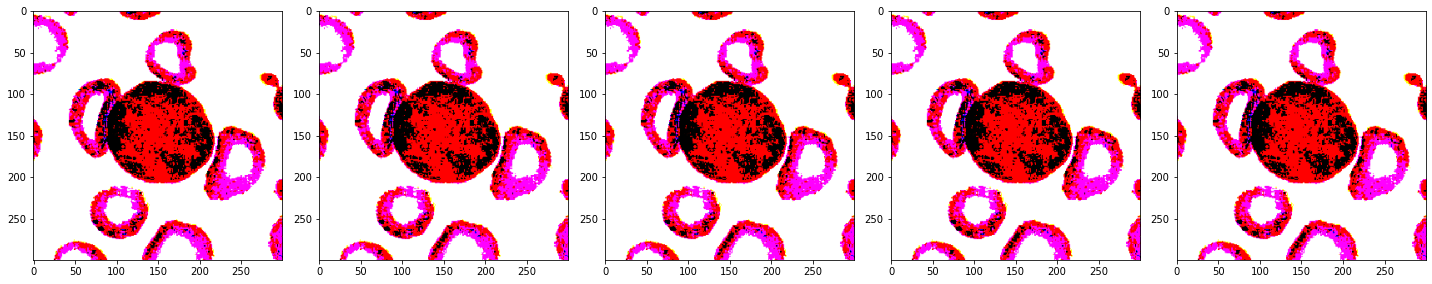

In [ ]:
import matplotlib.pyplot as plt 
def plot(image):
  '''
    The function is used to plot the augmented figures of the images, for visual demonstartion !

    params: image object
    return: None
  '''
  fig,axes=plt.subplots(1,5,figsize=(20,20))    # 20 x 20 images 
  axes=axes.flatten()
  for imag,axis in zip(image,axes):              #iterate through the images matplotlib and cv2
    axis.imshow(imag)
  plt.tight_layout()
  plt.show()

training_images_datagen.class_indices
sample_images=[training_images_datagen[0][0][0] for i in range(5)]
plot(sample_images)

In [10]:
from keras.layers import MaxPooling2D,Conv2D,Dropout,Dense,Flatten,BatchNormalization,MaxPool2D,AveragePooling2D,GlobalAveragePooling2D
from keras.models import Sequential

# **Multiclass Test Classifier !**

In [ ]:
'''
The CNN model is used to predict whether the given data image is of ALL,AML,CLL,CML or Normal type,
it contains 5 convolution and corresponding number of maxpooling layers.
RelU function is added to each layer so that it can introduce non-linearity and 
avoid the negative values !
'''

custom_model  =  Sequential([Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)), 
                          MaxPooling2D(2, 2),
                          Conv2D(32, (3,3), activation='relu'),
                          MaxPooling2D(2,2),                                    
                          Conv2D(64, (3,3), activation='relu'),
                          MaxPooling2D(2,2),                                   
                          Conv2D(64, (3,3), activation='relu'), 
                          MaxPooling2D(2,2),                                   
                          Conv2D(64, (3,3), activation='relu'), 
                          MaxPooling2D(2,2),                                   
                          Flatten(),                                                         
                          Dense(512, activation='relu'),
                          Dense(CATEGORIES, activation='softmax')])       #softmax gives prediction values for cancer cells

custom_model.summary()

# **Multiclass Classifier Based On AlexNet**

In [ ]:
'''
Implementation of the AlexNet architecture, which is an common architecture of the CNN model
The AlexNet Alrchitecture has been modified since, the original one is capable of classifiying
upto 1000 tensors, and requires more computational power !
'''

alexnet_model =Sequential([
                    Conv2D(96, (11, 11), strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
                    BatchNormalization(),
                    MaxPooling2D((3, 3),strides=(2,2)),
                    Conv2D(256, (5, 5),padding='same', activation='relu'),                    
                    MaxPooling2D((3, 3),strides=(2, 2)),
                    Conv2D(384, (3, 3), padding='same',activation='relu'),
                    Conv2D(384, (3, 3), padding='same',activation='relu'),
                    Conv2D(256, (3, 3), padding='same',activation='relu'),
                    MaxPooling2D((3, 3),strides=(2, 2)),
                    Flatten(),
                    Dense(4096, activation='relu'),                 
                    Dropout(0.5),
                    Dense(4096, activation='relu'),                
                    Dropout(0.5),
                    Dense(CATEGORIES, activation='softmax')])

alexnet_model.summary()

# **Multiclass Classifier Based On VGG 16**

In [ ]:
'''
  VGG-16 is a convolutional neural network model trained on the ImageNet dataset. 
  The model is characterized by its deep architecture, which consists of 16 layers, 
  including 13 convolutional layers and 3 fully connected layers. The convolutional layers 
  are organized into 5 blocks, with each block containing multiple convolutional layers
  and a max pooling layer. The model takes an image as input and classifies it into one 
  of 1000 object categories.The VGG-16 model is widely used as a base model for image 
  classification and object detection tasks.
'''

from keras.applications.vgg16 import VGG16  

# referencing the base model with imagenet weights and removing the top layers for fine-tuning
vgg16_base =  VGG16(weights='imagenet',
              include_top = False,
              input_shape = (224, 224, 3))

trainable = False

for layer in vgg16_base.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    if trainable:
        layer.trainable = True
    else:
        layer.trainable = False

#fine-tuning the vgg16 model to classify the 5 types of cells
vgg16_model = Sequential([vgg16_base,
                          Flatten(),
                          Dropout(0.5),
                          Dense(256,activation='relu'),
                          Dense(CATEGORIES,activation='softmax')])

vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_____________________________________

# **Multiclass Classifier Based On ResNet50**

In [11]:
'''
  ResNet50 is a deep convolutional neural network that was trained on more than a million images from the ImageNet database. 
  The network is 50 layers deep and can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.
  It was developed by researchers at Microsoft Research in 2015, and has since become a popular model for image classification tasks 
  due to its high accuracy and efficient use of computational resources. The key innovations in ResNet50 are the use of residual 
  connections and batch normalization, which make it possible to train very deep networks without the problems of vanishing gradients
'''

from keras.applications.resnet import ResNet50   

resnet50_base = ResNet50(weights="imagenet", 
    include_top=False,
    input_shape=(224,224,3)
)

for layer in resnet50_base.layers[:165]:
   layer.trainable = False
for layer in resnet50_base.layers[165:]:
   layer.trainable = True

resnet50_model = Sequential(
                          [resnet50_base,                         
                          Flatten(),
                          Dropout(0.5),
                          Dense(256,activation='relu'),
                          Dropout(0.5),
                          Dense(CATEGORIES, activation='softmax')
                          ])

resnet50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 49,279,365
Trainable params: 30,157,317
No

# **Multiclass Classifier Based On InceptionV3**

In [ ]:
'''
  InceptionV3 is a deep convolutional neural network that was trained for image classification on the ImageNet dataset. 
  The network is made up of a series of modules, called Inception modules, which are designed to identify and extract a wide variety of features from 
  an image at multiple scales. The key innovation in InceptionV3 is the use of depthwise separable convolutions, which significantly
  reduce the number of parameters in the model, making it more efficient to run on resource-constrained devices. 
  It also includes a module called the "auxiliary classifier" which gives more informations about image during backpropagation, 
  which enhance its performance. InceptionV3 is widely used in image recognition, and related tasks like object detection and 
  semantic segmentation, Due to its high accuracy, low computation cost and scalable nature
'''

from keras.applications import InceptionV3 

inceptionv3_base = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(299, 299,3))
# inceptionv3_base.trainable = False
inceptionv3_model = Sequential()
inceptionv3_model.add(inceptionv3_base)
inceptionv3_model.add(GlobalAveragePooling2D())
inceptionv3_model.add(Dropout(0.5))
inceptionv3_model.add(Dense(CATEGORIES,activation='softmax'))
inceptionv3_model.summary()

# **Multiclass Classifier Based On EfficientNet-B7**

In [ ]:
from keras.applications import EfficientNetB7
efficientnet_base = EfficientNetB7(weights='imagenet', include_top=True)
for layer in efficientnet_base.layers[:-15]:
    layer.trainable = False

efficientnet_model = Sequential(
                          [efficientnet_base,                         
                          Flatten(),
                          Dropout(0.5),
                          Dense(256,activation='relu'),
                          Dropout(0.5),
                          Dense(CATEGORIES, activation='softmax')
                          ])

efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 1000)             66658687  
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               256256    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 66,916,228
Trainable params: 8,153,741
Non

# **Compile the model**

In [12]:
from tensorflow.keras.optimizers import RMSprop,Adam  
                            
def compile_model(model):
  '''
    Compiling the model using the loss function  crossentropy and RMSProp !
    
    params : model object 
    return : None
  '''

  model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr=1e-5), #optionally use the Adam with learning rate 0.001 - 1e-5
                metrics=['accuracy'])
compile_model(resnet50_model)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# **The Path To Model H5 Files**

In [15]:
'''
The below callback list is used to moniter the validation accuracy, and the save the best version of the
CNN model. The paths has been specified for later use !

The Classifier model and the history file are saved in the DCNN Classifier Models directory, in the format:

Model_Name_Directory
                | 
                |
                 ---- Model_File.h5
                 ---- Model_History.pickle
                 -----Model_Test_Accuracy.pickle
'''

custom_model_path          =          '/content/drive/MyDrive/DCNN Classifier Models /Test Classifier/Test Classifier_Model.h5'
alexnet_model_path         =          '/content/drive/MyDrive/DCNN Classifier Models /AlexNet Classifier/AlexNet_Classifier_Model.h5'
resnet50_model_path        =          '/content/drive/MyDrive/DCNN Classifier Models /resnet50_base Classifier/ResNet_Classifier_Model.h5'
vgg16_model_path           =          '/content/drive/MyDrive/DCNN Classifier Models /VGGNet Classifier/VGGNet_Model.h5'
inceptionv3_model_path     =          '/content/drive/MyDrive/DCNN Classifier Models /GoogleNet Classifier/GoogleNet_Model.h5'
efficientnet_model_path    =          '/content/drive/MyDrive/DCNN Classifier Models /GoogleNet Classifier/EfficientNet_Model.h5'

# **Validation and CallBack Lists**

# Early Stopping To Prevent Overfitting Of The Models

In [17]:
'''
Early stopping is a mechanism, which allows to moniter a value, specially the val_loss, and stop the 
training, at a particular patience level, to avoid overfitting !
'''

from keras.callbacks import ModelCheckpoint,EarlyStopping 
early_call_back = EarlyStopping(monitor="val_loss",patience=8,verbose=1,mode="auto",restore_best_weights=True)

# Model Check Points To Save The Best Weights

In [18]:
'''
Specifying the model checkpoint by monitering the value accuracy, with maximum value adjustments and adding
that to callback list !
'''

callback_checkpoint = ModelCheckpoint(resnet50_model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callback_checkpoint_list = [callback_checkpoint,early_call_back]    #can remove the early stopping if needed !

# **Training the datset based on given model !**

In [19]:
def train_the_model(model):
  '''
    The function takes in model as an arguement and trains it according to given epochs and batch size !
    epochs:depending on the early stopping

    Params: model object

    return: trained model
  '''
  the_final_train = model.fit(
                      training_images_datagen,
                      callbacks       = callback_checkpoint_list,
                      validation_data = valid_images_datagen,
                      steps_per_epoch = 3,          #the steps per epoch is set to 2, but cannot be set to more than 3(because of error !) 
                      epochs          = 80,         #change according to best fitting accuracy !
                      verbose         = 2,
                    )
  return the_final_train


trained_model=train_the_model(resnet50_model)

Epoch 1/80

Epoch 1: val_accuracy improved from -inf to 0.76923, saving model to /content/drive/MyDrive/DCNN Classifier Models /resnet50_base Classifier/ResNet_Classifier_Model.h5
3/3 - 402s - loss: 3.1420 - accuracy: 0.5279 - val_loss: 0.7565 - val_accuracy: 0.7692 - 402s/epoch - 134s/step
Epoch 2/80

Epoch 2: val_accuracy improved from 0.76923 to 0.79720, saving model to /content/drive/MyDrive/DCNN Classifier Models /resnet50_base Classifier/ResNet_Classifier_Model.h5
3/3 - 139s - loss: 1.2317 - accuracy: 0.7630 - val_loss: 0.6277 - val_accuracy: 0.7972 - 139s/epoch - 46s/step
Epoch 3/80

Epoch 3: val_accuracy improved from 0.79720 to 0.83217, saving model to /content/drive/MyDrive/DCNN Classifier Models /resnet50_base Classifier/ResNet_Classifier_Model.h5
3/3 - 73s - loss: 0.8774 - accuracy: 0.8255 - val_loss: 0.4735 - val_accuracy: 0.8322 - 73s/epoch - 24s/step
Epoch 4/80

Epoch 4: val_accuracy did not improve from 0.83217
3/3 - 59s - loss: 0.6990 - accuracy: 0.8281 - val_loss: 0.4

# **Saving History Pickle File !**

# Path To Store The Respective Model Training And Validation Losses

In [20]:
custom_model_history_pickle        = '/content/drive/MyDrive/DCNN Classifier Models /Test Classifier/Test Classifier_Model.pickle'
alexnet_model_history_pickle       = '/content/drive/MyDrive/DCNN Classifier Models /AlexNet Classifier/AlexNet_Classifier_Model.pickle'
resnet50_model_history_pickle      = '/content/drive/MyDrive/DCNN Classifier Models /resnet50_base Classifier/ResNet_Classifier_Model.pickle'
vgg16_model_history_pickle         = '/content/drive/MyDrive/DCNN Classifier Models /VGGNet Classifier/VGGNet_Model.pickle'
inceptionv3_model_history_pickle   = '/content/drive/MyDrive/DCNN Classifier Models /GoogleNet Classifier/GoogleNet_Model.pickle'
efficientnet_model_history_pickle  =  '/content/drive/MyDrive/DCNN Classifier Models /GoogleNet Classifier/EfficientNet_Model.pickle'

# **Saving the Accuracy and Loss To A Pickle File**

In [21]:
import pickle 
def save_file(pickle_dir,model_history):
  '''
    The model cannot path cannot be directly used to retrieve the history thats
    why we are saving the respective model history to a pickle file 

    params : model_history, path of pickle file 
    return : None

    
  '''
  with open(pickle_dir,'wb') as binary_pickle:
    binary_pickle.write(pickle.dumps(model_history))          #dumping to pickle before writing to pickle file !
    print(f'History Saved to {pickle_dir}')

save_file(vgg16_model_history_pickle,trained_model.history)  #the path of the model history pickle and the current model history !

History Saved to /content/drive/MyDrive/DCNN Classifier Models /VGGNet Classifier/VGGNet_Model.pickle


# **Accuracy and Loss Graph !**

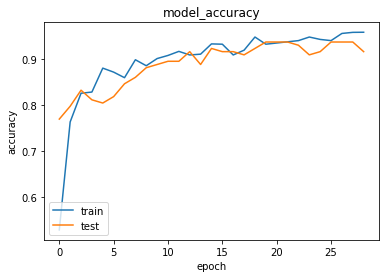

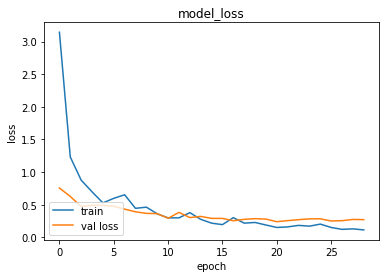

Training Accuracy : 95.83 %
Validation Accuracy : 91.61 %


In [24]:
import matplotlib.pyplot as plt

def plot_metrics(acc_path):
  '''
    The accuracy and the losses at each iteration/epoch is evaluated in the graph below
    matplotlib is used for plotting.
    
    params: model history path (.pickle file)
    return: None
  '''
  with open(acc_path,'rb') as model_history: #opening the pickle file which contains the dictionary !
    model=model_history.read()
  model=pickle.loads(model)
  plt.plot(model['accuracy'])
  plt.plot(model['val_accuracy'])
  plt.title('model_accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='lower left')
  plt.show()

  plt.plot(model['loss'])
  plt.plot(model['val_loss'])
  plt.title('model_loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','val loss'],loc='lower left')
  plt.show()
  train_acc = model['accuracy'][-1]*100
  val_acc   = model['val_accuracy'][-1]*100
  print(f'Training Accuracy : {round(train_acc,2)} %')
  print(f'Validation Accuracy : {round(val_acc,2)} %')

plot_metrics(vgg16_model_history_pickle)


# **Getting The Prediction Values From The Models**

In [27]:
import keras.utils as image
import tensorflow as tf

def get_preds(model,image_path):
  '''
    The function to get prediction value, which basically returns the probablity values of 
    corresponding cancer types !
    
    params: model, image_location path
    return: 
  '''
  size = (224,224)                                                  # default set to 224 x 224 for VGG and ResNet50
  if model == 'AlexNet':
    model,size = alexnet_model_path,model_dict['AlexNet']
  elif model == 'Binary':
    model,size = custom_model_path,model_dict['Binary']
  elif model == 'ResNet':
    model = resnet50_model_path
  elif model == 'InceptionV3':
    model = inceptionv3_model_path
  elif model == 'VGG':
    model = vgg16_model_path
  else:
    raise Exception('Invalid Model Arguments !')                      # exception thrown for invalid path !

  model = keras.models.load_model(model)                              # loading the model.h5 from the drive !
  img   = tf.keras.utils.load_img(image_path, target_size=size)       
  img   = image.img_to_array(img)
  img   = np.expand_dims(img, axis=0)                                 # expanding along one axis 
  result_vector = model.predict(img).round(1)
  return result_vector[0]

# Obtaining the Prediced values and Actual Values

In [ ]:
y_preds = [get_preds('resnet50_base',x) for x in tests]
y_true = test_images_datagen.classes
class_labels = list(test_images_datagen.class_indices.keys())

# **AUC ROC Metrics**

In [ ]:
from sklearn.metrics import roc_auc_score

def get_roc_auc(model):
  '''
  ROC AUC is generally used for binary classification parameter analysis, but for the 
  case of multiclass, it is used as a one vs many/one vs rest approach !

  params: model st
  '''
  y_pred = model.predict(X_test)
  auc = roc_auc_score(y_test, y_pred, multi_class='ovr')  #using the on vs rest approach !
  print("AUC-ROC score: {:.3f}".format(auc))

# **Plot The ROC AUC Curve**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# generate some example data
y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]

# calculate AUC
auc = roc_auc_score(y_true, y_scores)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#**Testing for Cancer vs Normal**

In [29]:
import numpy as np
def check_for_cancer(model,image_path):      
  '''
    The final module of the system which basically predicts whether given cell is of CML,CLL,ALL or AML,
    based on the image and the prediction model file !

    params: path to the model, the path to the image !
    return: Cancer Prediction (str) 
 
   
  '''           
  result_vector = get_preds(model,image_path).tolist()  
  c_array = {0:'ALL', 1:'AML', 2:'CLL', 3:'CML', 4:'Normal'}
  index = result_vector.index(max(result_vector))                
  return c_array[index]


model  = 'VGG'
print(f'Prediction Based on the {model} Classifier !')
print(check_for_cancer(model,'/content/drive/MyDrive/DCNN Datasets_1/Testing/ALL/Im001_1.tif'))

Prediction Based on the VGG Classifier !
1/1 [==============================] - 0s 124ms/step
ALL


# Path to store the Test Accuracy

In [31]:
custom_model_acc_path       = '/content/drive/MyDrive/DCNN Classifier Models /Test Classifier/Test Classifier_Model.pickle'
alexnet_model_acc_path      = '/content/drive/MyDrive/DCNN Classifier Models /AlexNet Classifier/AlexNet_Classifier_Model_Acc.pickle'
resnet_model_acc_path       = '/content/drive/MyDrive/DCNN Classifier Models /resnet50_base Classifier/ResNet_Classifier_Model_Acc.pickle'
vgg16_model_acc_path        = '/content/drive/MyDrive/DCNN Classifier Models /VGGNet Classifier/VGGNet_Model_Acc.pickle'
inceptionv3_model_acc_path  = '/content/drive/MyDrive/DCNN Classifier Models /GoogleNet Classifier/GoogleNet_Model_acc.pickle'

# **Save Testing Accuracy To Pickle File**

In [34]:
def get_accuracy(model_path:str,test_datagen,pickle_file:str)->None:
  '''
    The optional block of code only run if the accuracy is to be calculated !
    
    params: model_path, test_generator, pickle_file path
    return: None
    
'''

  model = keras.models.load_model(custom_model_path)
  loss,accuracy = model.evaluate(test_datagen,batch_size = 128)
  with open(pickle_file,'wb') as binary_pickle:
    binary_pickle.write(pickle.dumps((loss,accuracy)))     #dumping to pickle before writing to pickle file !
    print(f'Accuracy Saved to {pickle_file}')

get_accuracy(vgg16_model_path,test_images_datagen,vgg16_model_acc_path)

InvalidArgumentError: ignored

# **Retrieve Accuracy From Pickle File**

In [ ]:
def show_accuracy(model:str,acc_path:str)->None:
  '''
    The model accuracy is originally stored in the drive folder for the sake of simplicity, we refer the 
    pickle file path and fetch accuarcy info of the respective model and print their accuracy

    params: accuracy_path
    return: None
  '''

  with open(acc_path,'rb') as pickle_file:
    bin = pickle.loads(pickle_file.read()) 
    
    acc = round((bin[1]),3)*100
    print(f'Accuracy for {model}  : {acc}%')

In [ ]:
show_accuracy('ResNet',resnet50_base_acc_pickle_path)

# **Installing Dependencies For Flask REST-API**

In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python3 /content/drive/MyDrive/REST-API-For-DCNN-Models-master/flask-api/app.py

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Running on http://6c3c-34-87-77-250.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
INFO:werkzeug:127.0.0.1 - - [13/Jan/2023 05:39:11] "HEAD / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/Jan/2023 05:39:24] "GET / HTTP/1.1" 200 -
